In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('train.csv')

In [44]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [45]:
y = df["class"]
y = y.map({"p":-1, "e":1})

In [46]:
X = df.drop(["class"], axis=1)

In [47]:
X.isnull().sum()

id                            0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
X.shape

(3116945, 21)

In [9]:
y.value_counts()

class
-1    1705396
 1    1411549
Name: count, dtype: int64

In [48]:
X = X.drop(["stem-root", "veil-type", "veil-color", "spore-print-color"], axis=1)

In [11]:
X.shape

(3116945, 17)

In [12]:
X.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


In [49]:
X = X.drop(["gill-spacing", "stem-surface"], axis=1)


In [14]:
X.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,1,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,2,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,3,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,4,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a


### Выделение и преобразование категориальных признаков

In [50]:
cat_cols = ["cap-shape","cap-surface",  "cap-color", "does-bruise-or-bleed", "gill-attachment","gill-color", "stem-color", "has-ring", "ring-type", "habitat", "season"]

In [51]:
encoder = LeaveOneOutEncoder(return_df=True)
X1 = encoder.fit_transform(X,y)
X1.dtypes


id                        int64
cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [9]:
X1.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173
1,1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986
2,2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979
3,3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
4,4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173


In [30]:
X1.isnull().sum()

id                      0
cap-diameter            4
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [52]:
X1.fillna(X1.mean(), inplace=True) # избавимся от пропусков в cap-diameter
X1 = X1.drop("id", axis=1)


In [53]:
X1.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

**Разделим выборку**

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, test_size=0.3, random_state=42)

**Обучим линейную модель**

In [48]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

y_train = model.predict(Xtrain)
y_pred = model.predict(Xtest)


print(accuracy_score(ytest, y_pred))

/home/malleo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7560144329279509


In [15]:
X2.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
222750,222750,1.97,-0.546072,-0.194367,0.018170,-0.111526,-0.277941,-0.429756,5.88,2.64,-0.221855,-0.066508,-0.093476,-0.057677,0.223411
1417407,1417407,1.56,-0.085563,-0.194375,0.018169,-0.111527,-0.292689,0.038004,5.29,1.70,0.217152,-0.066509,-0.093477,0.210151,-0.164923
591229,591229,0.67,-0.020332,-0.194367,0.018170,-0.111526,-0.292686,-0.429756,3.73,0.93,-0.573571,-0.066508,-0.093476,-0.057677,-0.143172
229407,229407,7.06,-0.020332,-0.284789,0.018170,-0.111526,-0.178312,-0.429756,5.63,8.83,-0.221855,-0.066508,-0.093476,-0.057677,-0.164921
2470459,2470459,3.83,-0.546072,0.076038,0.018170,-0.111526,-0.277941,0.038013,6.58,4.65,0.164573,-0.066508,-0.093476,-0.057677,-0.143172


** Закодируем категориальные признаки с помощью OneHotEncoder**

In [12]:
X3 = X.iloc[:1700000]
y1 = y.iloc[:1700000]

In [13]:
encoder_2 = OneHotEncoder(return_df=True)
X4 = encoder_2.fit_transform(X3,y1)

In [38]:
X4

,id,cap-diameter,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-shape_7,cap-shape_8,...,habitat_37,habitat_38,habitat_39,habitat_40,habitat_41,habitat_42,season_1,season_2,season_3,season_4
0,0,8.80,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,4.51,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,6.94,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,3.88,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5.85,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,1499995,1.71,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1499996,1499996,10.97,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1499997,1499997,1.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1499998,1499998,4.19,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X4.isnull().sum()

id              0
cap-diameter    1
cap-shape_1     0
cap-shape_2     0
cap-shape_3     0
               ..
habitat_45      0
season_1        0
season_2        0
season_3        0
season_4        0
Length: 455, dtype: int64

In [15]:
X4.fillna(X4.mean(), inplace=True) # избавимся от пропусков в cap-diameter

In [41]:
X4.isnull().sum()

id              0
cap-diameter    0
cap-shape_1     0
cap-shape_2     0
cap-shape_3     0
               ..
habitat_42      0
season_1        0
season_2        0
season_3        0
season_4        0
Length: 435, dtype: int64

In [16]:
X4 = X4.drop("id", axis=1)

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X4, y1, test_size=0.3, random_state=42)

In [18]:
model2 = LogisticRegression()
model2.fit(Xtrain, ytrain)

y_train = model2.predict(Xtrain)
y_pred = model2.predict(Xtest)


print(accuracy_score(ytest, y_pred))

/home/malleo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7745352941176471


**Посмотрим как коррелируют признаки**

In [15]:
df = df.drop(["stem-root", "veil-type", "veil-color", "spore-print-color"], axis=1)

In [16]:
df = df.drop("id", axis=1)

In [10]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,NaN,w,t,g,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,y,w,t,p,d,u


In [22]:
df["class"] = df["class"].map({"p":1, "e":0}) 

In [23]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,0,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,0,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,0,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,NaN,w,t,g,d,u
3116941,0,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u
3116942,1,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a
3116943,0,9.45,p,i,n,t,e,NaN,p,9.13,17.77,y,w,t,p,d,u


In [24]:
df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-surface            1980861
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64

In [40]:
encoder = LeaveOneOutEncoder(return_df=True)
X1 = encoder.fit_transform(X,y)
X1.dtypes

cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-spacing            float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-surface            float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [41]:
X1.isnull().sum()

cap-diameter                  4
cap-shape               3116945
cap-surface             3116945
cap-color               3116945
does-bruise-or-bleed    3116945
gill-attachment         3116945
gill-spacing            3116945
gill-color              3116945
stem-height                   0
stem-width                    0
stem-surface            3116945
stem-color              3116945
has-ring                3116945
ring-type               3116945
habitat                 3116945
season                  3116945
dtype: int64

In [30]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,0,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,0,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,0,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,NaN,w,t,g,d,u
3116941,0,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u
3116942,1,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a
3116943,0,9.45,p,i,n,t,e,NaN,p,9.13,17.77,y,w,t,p,d,u


In [42]:
X1.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.51,15.39,NaN,NaN,NaN,NaN,NaN,NaN
1,4.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.79,6.48,NaN,NaN,NaN,NaN,NaN,NaN
2,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.85,9.93,NaN,NaN,NaN,NaN,NaN,NaN
3,3.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.16,6.53,NaN,NaN,NaN,NaN,NaN,NaN
4,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.37,8.36,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,NaN,w,t,g,d,u
3116941,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u
3116942,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a
3116943,9.45,p,i,n,t,e,NaN,p,9.13,17.77,y,w,t,p,d,u


In [54]:
X1

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173
1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986
2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979
3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,-0.023890,-0.027656,0.018169,-0.013248,-0.277945,0.143119,12.14,18.81,0.164571,-0.182209,0.157052,-0.057678,-0.164923
3116941,10.88,-0.098917,-0.027656,0.005880,-0.013248,-0.142756,-0.180421,6.65,26.97,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
3116942,7.82,-0.020332,0.043146,-0.586495,-0.111526,-0.292686,0.143122,9.51,11.06,-0.387550,-0.182206,-0.992318,-0.057677,-0.143172
3116943,9.45,0.081185,-0.643844,0.018169,-0.013248,0.302067,-0.180421,9.13,17.77,0.164571,-0.182209,-0.028296,-0.057678,-0.164923


In [58]:
X2 = X1 

In [57]:
y

0          1
1         -1
2          1
3          1
4          1
          ..
3116940    1
3116941    1
3116942   -1
3116943    1
3116944   -1
Name: class, Length: 3116945, dtype: int64

In [59]:
X2.insert (loc= len(X2.columns) , column='class', value=y)

In [60]:
X2

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173,1
1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986,-1
2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979,1
3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923,1
4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,-0.023890,-0.027656,0.018169,-0.013248,-0.277945,0.143119,12.14,18.81,0.164571,-0.182209,0.157052,-0.057678,-0.164923,1
3116941,10.88,-0.098917,-0.027656,0.005880,-0.013248,-0.142756,-0.180421,6.65,26.97,0.164571,-0.066509,-0.093477,-0.057678,-0.164923,1
3116942,7.82,-0.020332,0.043146,-0.586495,-0.111526,-0.292686,0.143122,9.51,11.06,-0.387550,-0.182206,-0.992318,-0.057677,-0.143172,-1
3116943,9.45,0.081185,-0.643844,0.018169,-0.013248,0.302067,-0.180421,9.13,17.77,0.164571,-0.182209,-0.028296,-0.057678,-0.164923,1


In [69]:
plt.rcParams["figure.figsize"] = (15,12)

In [66]:


corr = X2.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True);

/tmp/ipykernel_11529/3889386036.py:2: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Axes: >

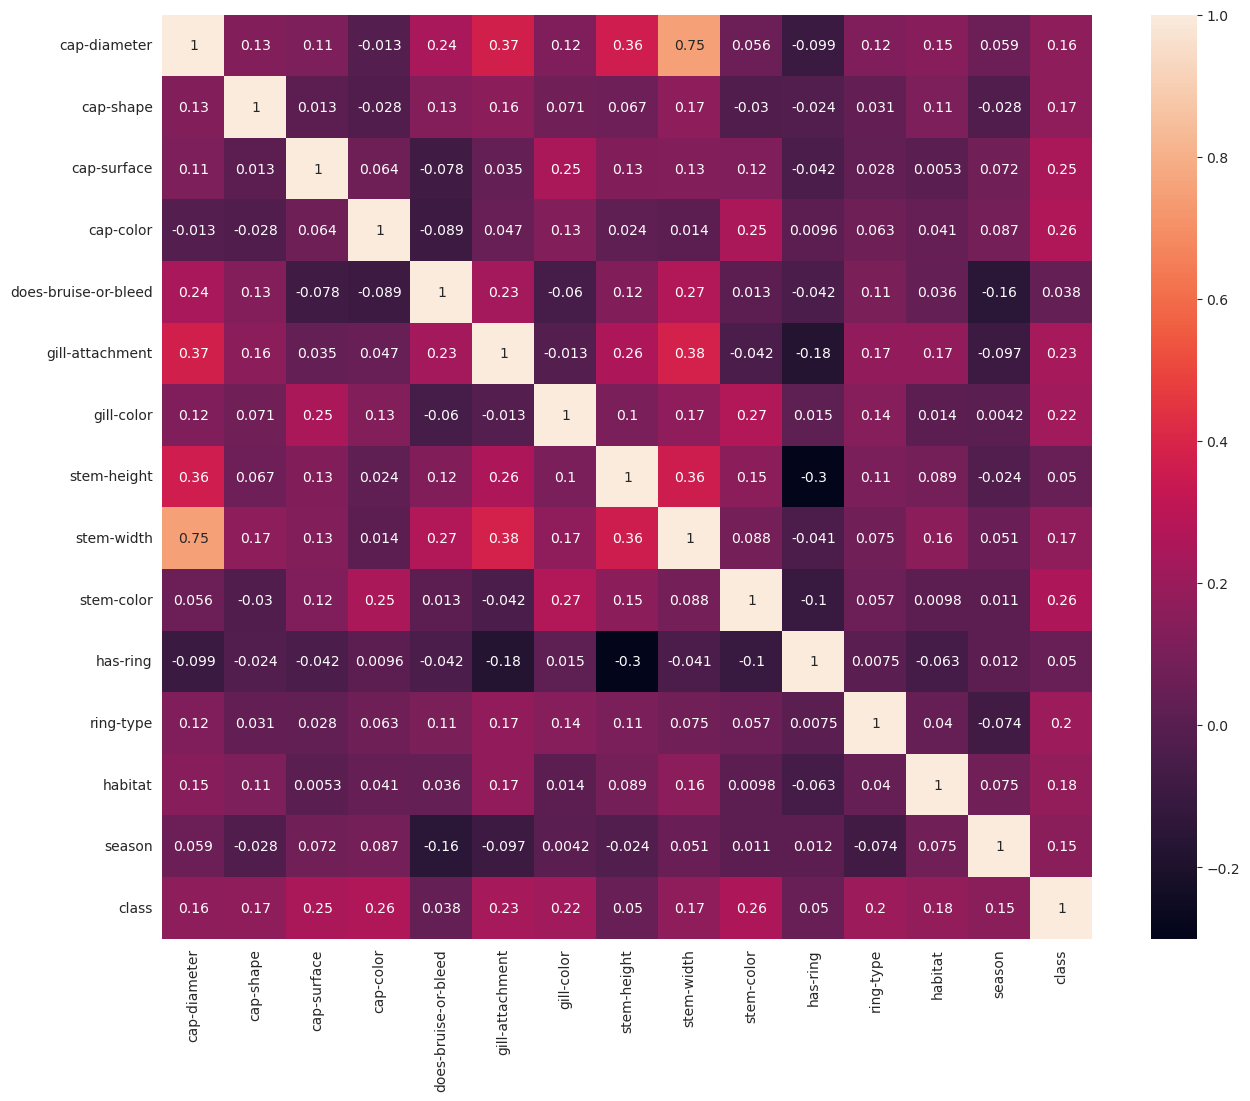

In [70]:
sns.heatmap(X2.corr(), annot = True)